In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Задание 1

In [14]:
train_data = pd.read_csv("svmdata1.txt", delimiter="\t")
test_data = pd.read_csv("svmdata1test.txt", delimiter="\t")
X_train = train_data[["X1", "X2"]]
y_train = train_data["Color"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Color"]

In [15]:
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)
print("Ошибка классификации на тестовой выборке: ", 1-accuracy_score(y_test, y_predict_test))
print("Ошибка классификации на тренировочной выборке: ", 1-accuracy_score(y_train, y_predict_train))
print("Число опорных векторов: ", len(model.support_vectors_))

Ошибка классификации на тестовой выборке:  0.0
Ошибка классификации на тренировочной выборке:  0.0
Число опорных векторов:  6


C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


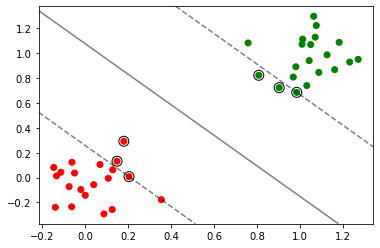

In [9]:
# Построение графика данных и гиперплоскости разделения
plt.scatter(X_train["X1"], X_train["X2"], c=y_predict_train, cmap=plt.cm.Paired)
# Получение текущих осей
ax = plt.gca()
# Создание сетки точек для построения гиперплоскости разделения
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 40)
yy = np.linspace(ylim[0], ylim[1], 40)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
# Визуализация гиперплоскости разделения и опорных векторов
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')

# Задание 2

In [16]:
train_data = pd.read_csv("svmdata2.txt", delimiter="\t")
test_data = pd.read_csv("svmdata2test.txt", delimiter="\t")
X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]

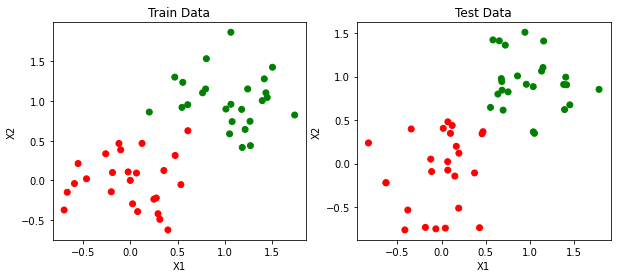

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

colors_train = np.where(y_train == 'red', 'red', 'green')
axs[0].scatter(train_data["X1"], train_data["X2"], c=colors_train)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_title("Train Data")

colors_test = np.where(y_test == 'red', 'red', 'green')
axs[1].scatter(test_data["X1"], test_data["X2"], c=colors_test)
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
axs[1].set_title("Test Data")

plt.show()

In [32]:
acc_test = []
acc_train = []
c_value = 1
while True:
    model = svm.SVC(kernel='linear', C=c_value)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    acc_test.append(1-accuracy_score(y_test, y_predict_test))
    acc_train.append(1-accuracy_score(y_train, y_predict_train))
    if (1-accuracy_score(y_train, y_predict_train)) == 0:
        break
    c_value = c_value + 1
c_values = [i for i in range(1, c_value+1)]

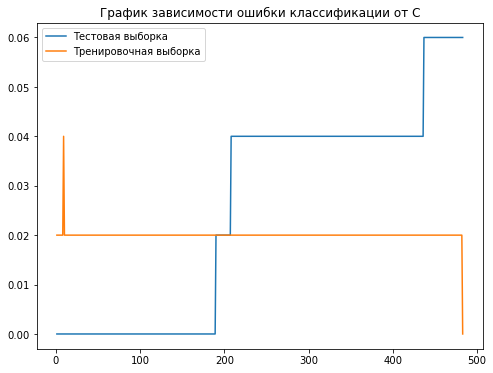

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(c_values, acc_test, label="Тестовая выборка")
ax.plot(c_values, acc_train, label="Тренировочная выборка")
ax.set_title("График зависимости ошибки классификации от C")
ax.legend()

Из графика можно заметить, что пытаясь добиться нулевой ошибки для тренировочной выборки, мы получаем переобучение и ухудшаем точность для тестовой выборки. При С = 1 ошибка классификации для тестовой выборки равна 0, при С = 483 ошибка классификации для тренировочной выборки становится равной 0. В качестве оптимального C я бы выбрал 1, так как при 1 наиболее простая модель, при этом ошибка для тестовой выборки равна 0.

# Задание 3

In [21]:
data = pd.read_csv("svmdata3.txt", delimiter="\t")
train_data = data.head(50)
test_data = data.tail(50)
X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]
y_train = y_train.apply(lambda x: 0 if x == 'red' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'red' else 1)

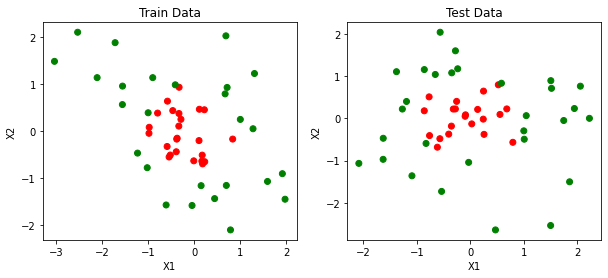

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

colors_train = np.where(y_train == 'red', 'red', 'green')
axs[0].scatter(train_data["X1"], train_data["X2"], c=colors_train)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_title("Train Data")

colors_test = np.where(y_test == 'red', 'red', 'green')
axs[1].scatter(test_data["X1"], test_data["X2"], c=colors_test)
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
axs[1].set_title("Test Data")

plt.show()

In [66]:
kernels = ['poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = svm.SVC(kernel=kernel, C=2)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    print("Ядро: ", kernel)
    print("Ошибка для тестовой выборки: ", 1-accuracy_score(y_test, y_predict_test))
    print("Ошибка для тренировочной выборки: ", 1-accuracy_score(y_train, y_predict_train))

Ядро:  poly
Ошибка для тестовой выборки:  0.43999999999999995
Ошибка для тренировочной выборки:  0.4
Ядро:  rbf
Ошибка для тестовой выборки:  0.040000000000000036
Ошибка для тренировочной выборки:  0.020000000000000018
Ядро:  sigmoid
Ошибка для тестовой выборки:  0.52
Ошибка для тренировочной выборки:  0.64


Оптимальным является "radial" ядро. 

Давайте теперь посмотрим, что будет при изменении C, то есть при усложнении модели.

In [90]:
acc_test_poly = []
acc_test_rbf = []
acc_test_sigmoid = []
c_values = [i for i in range(1, 200)]
for c in c_values:
    for kernel in kernels:
        model = svm.SVC(kernel=kernel, C=c)
        model.fit(X_train, y_train)
        y_predict_test = model.predict(X_test)
        y_predict_train = model.predict(X_train)
        if kernel == 'poly':
            acc_test_poly.append(1-accuracy_score(y_test, y_predict_test))
        if kernel == 'rbf':
            acc_test_rbf.append(1-accuracy_score(y_test, y_predict_test))
        if kernel == 'sigmoid':
            acc_test_sigmoid.append(1-accuracy_score(y_test, y_predict_test))

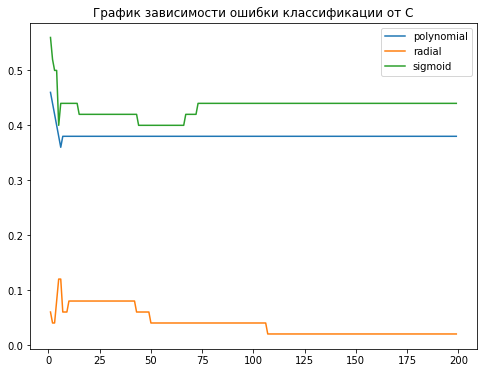

In [91]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(c_values, acc_test_poly, label="polynomial")
ax.plot(c_values, acc_test_rbf, label="radial")
ax.plot(c_values, acc_test_sigmoid, label="sigmoid")
ax.set_title("График зависимости ошибки классификации от C")
ax.legend(loc='upper right')

Можно заметить, что при небольшом увеличении C для "polynomial" и "sigmoid" ядер немного увеличивается точность.

In [96]:
for degree in range(1,21):
    model = svm.SVC(kernel='poly', C=1, degree=degree)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    print("Степень ", degree)
    print("Ошибка для тестовой выборки: ", 1-accuracy_score(y_test, y_predict_test))

Степень  1
Ошибка для тестовой выборки:  0.42000000000000004
Степень  2
Ошибка для тестовой выборки:  0.16000000000000003
Степень  3
Ошибка для тестовой выборки:  0.45999999999999996
Степень  4
Ошибка для тестовой выборки:  0.19999999999999996
Степень  5
Ошибка для тестовой выборки:  0.56
Степень  6
Ошибка для тестовой выборки:  0.21999999999999997
Степень  7
Ошибка для тестовой выборки:  0.5
Степень  8
Ошибка для тестовой выборки:  0.21999999999999997
Степень  9
Ошибка для тестовой выборки:  0.54
Степень  10
Ошибка для тестовой выборки:  0.21999999999999997
Степень  11
Ошибка для тестовой выборки:  0.45999999999999996
Степень  12
Ошибка для тестовой выборки:  0.21999999999999997
Степень  13
Ошибка для тестовой выборки:  0.42000000000000004
Степень  14
Ошибка для тестовой выборки:  0.21999999999999997
Степень  15
Ошибка для тестовой выборки:  0.43999999999999995
Степень  16
Ошибка для тестовой выборки:  0.21999999999999997
Степень  17
Ошибка для тестовой выборки:  0.48
Степень  18
Ошиб

Заметно, что для четных степеней ошибка получается ниже, но при больших степенях происходит переобучение, увеличим тренировочную выборку.

In [102]:
train_data = data.head(90)
test_data = data.tail(10)
X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]
for degree in range(1,21):
    model = svm.SVC(kernel='poly', C=1, degree=degree)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    print("Степень ", degree)
    print("Ошибка для тестовой выборки: ", 1-accuracy_score(y_test, y_predict_test))

Степень  1
Ошибка для тестовой выборки:  0.6
Степень  2
Ошибка для тестовой выборки:  0.09999999999999998
Степень  3
Ошибка для тестовой выборки:  0.6
Степень  4
Ошибка для тестовой выборки:  0.09999999999999998
Степень  5
Ошибка для тестовой выборки:  0.6
Степень  6
Ошибка для тестовой выборки:  0.09999999999999998
Степень  7
Ошибка для тестовой выборки:  0.6
Степень  8
Ошибка для тестовой выборки:  0.09999999999999998
Степень  9
Ошибка для тестовой выборки:  0.6
Степень  10
Ошибка для тестовой выборки:  0.09999999999999998
Степень  11
Ошибка для тестовой выборки:  0.6
Степень  12
Ошибка для тестовой выборки:  0.09999999999999998
Степень  13
Ошибка для тестовой выборки:  0.19999999999999996
Степень  14
Ошибка для тестовой выборки:  0.09999999999999998
Степень  15
Ошибка для тестовой выборки:  0.19999999999999996
Степень  16
Ошибка для тестовой выборки:  0.09999999999999998
Степень  17
Ошибка для тестовой выборки:  0.19999999999999996
Степень  18
Ошибка для тестовой выборки:  0.0999999

Переобучение удалось избежать для четных степеней, а также улучшилась точность. Попробуем увеличить C для этой же увеличенной тренировочной выборки.

In [105]:
train_data = data.head(90)
test_data = data.tail(10)
X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]
for degree in range(1,21):
    model = svm.SVC(kernel='poly', C=25, degree=degree)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    print("Степень ", degree)
    print("Ошибка для тестовой выборки: ", 1-accuracy_score(y_test, y_predict_test))

Степень  1
Ошибка для тестовой выборки:  0.6
Степень  2
Ошибка для тестовой выборки:  0.0
Степень  3
Ошибка для тестовой выборки:  0.6
Степень  4
Ошибка для тестовой выборки:  0.0
Степень  5
Ошибка для тестовой выборки:  0.6
Степень  6
Ошибка для тестовой выборки:  0.09999999999999998
Степень  7
Ошибка для тестовой выборки:  0.6
Степень  8
Ошибка для тестовой выборки:  0.09999999999999998
Степень  9
Ошибка для тестовой выборки:  0.6
Степень  10
Ошибка для тестовой выборки:  0.09999999999999998
Степень  11
Ошибка для тестовой выборки:  0.19999999999999996
Степень  12
Ошибка для тестовой выборки:  0.09999999999999998
Степень  13
Ошибка для тестовой выборки:  0.19999999999999996
Степень  14
Ошибка для тестовой выборки:  0.09999999999999998
Степень  15
Ошибка для тестовой выборки:  0.30000000000000004
Степень  16
Ошибка для тестовой выборки:  0.09999999999999998
Степень  17
Ошибка для тестовой выборки:  0.30000000000000004
Степень  18
Ошибка для тестовой выборки:  0.09999999999999998
Степе

Мы смогли добиться нулевой ошибки для степеней 2 и 4. Сравним нашу подогнанную модель с моделью с "radial" ядром.

In [26]:
train_data = data.head(90)
test_data = data.tail(10)
X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]
y_train = y_train.apply(lambda x: 0 if x == 'red' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'red' else 1)
model1 = svm.SVC(kernel='poly', C=25, degree=2)
model1.fit(X_train, y_train)
y_predict_test1 = model1.predict(X_test)
model2 = svm.SVC(kernel='rbf', C=2)
model2.fit(X_train, y_train)
y_predict_test2 = model2.predict(X_test)

Подогнанная полинамиальная модель:  0.030000000000000027


C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


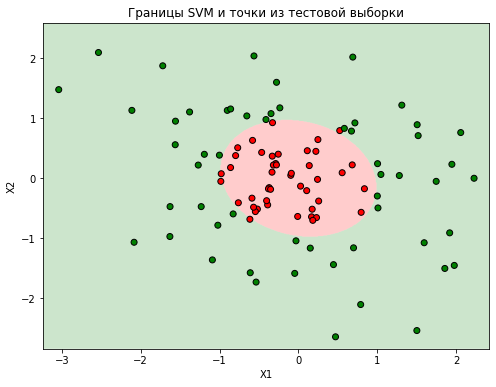

Модель с radial ядром  0.06000000000000005


C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


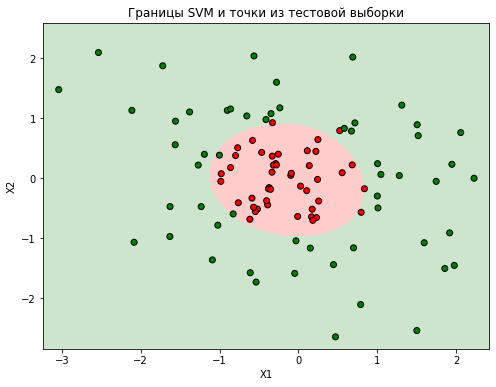

In [28]:
test_data = data.tail(100)
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]
y_train = y_train.apply(lambda x: 0 if x == 'red' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'red' else 1)
y_predict_test1 = model1.predict(X_test)
y_predict_test2 = model2.predict(X_test)
print("Подогнанная полинамиальная модель: ", 1-accuracy_score(y_test, y_predict_test1))

colors = np.where(y_test == 0, 'red', 'green')

xx_train, yy_train, Z_train = grid(X_train, model1)    

plt.figure(figsize=(8, 6))
plt.contourf(xx_train, yy_train, Z_train, cmap=ListedColormap(['r', 'g']), alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
plt.scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Границы SVM и точки из тестовой выборки')
plt.show()

print("Модель с radial ядром ", 1-accuracy_score(y_test, y_predict_test2))
colors = np.where(y_test == 0, 'red', 'green')

xx_train, yy_train, Z_train = grid(X_train, model2)    

plt.figure(figsize=(8, 6))
plt.contourf(xx_train, yy_train, Z_train, cmap=ListedColormap(['r', 'g']), alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
plt.scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Границы SVM и точки из тестовой выборки')
plt.show()

### Победа

Да, стоит заметить, что из-за малого количества данных (использование в качестве тестовых данных часть тренировочных) и не самых оптимальных условий для "radial" ядра это не особо правильно, однако разрыв если и есть, то он не такой большой, как был изначально. Можно сказать, что иногда полезно подгонять модель)

# Задание 4

In [11]:
train_data = pd.read_csv("svmdata4.txt", delimiter="\t")
test_data = pd.read_csv("svmdata4test.txt", delimiter="\t")
X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]
y_train = y_train.apply(lambda x: 0 if x == 'red' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'red' else 1)

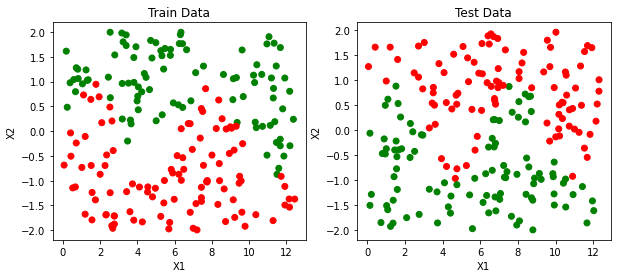

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

colors_train = np.where(y_train == 0, 'red', 'green')
axs[0].scatter(train_data["X1"], train_data["X2"], c=colors_train)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_title("Train Data")

colors_test = np.where(y_test == 1, 'red', 'green')
axs[1].scatter(test_data["X1"], test_data["X2"], c=colors_test)
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
axs[1].set_title("Test Data")

plt.show()

In [15]:
def grid(X, model):
    x_min, x_max = X["X1"].min() - 0.2, X["X1"].max() + 0.2
    y_min, y_max = X["X2"].min() - 0.2, X["X2"].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

Сразу воспользуемся знаниями, полученным в предыдущем задании для полиномиального ядра.

Ядро:  rbf
Ошибка для тестовой выборки:  0.10999999999999999
Ошибка для тренировочной выборки:  0.06499999999999995


C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


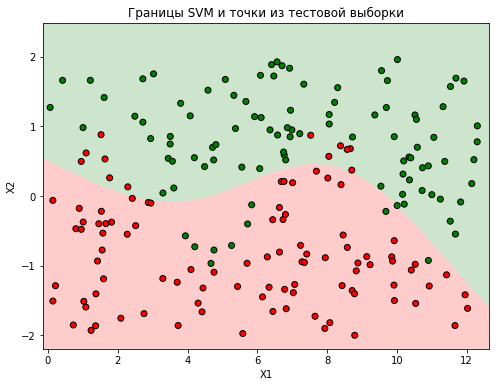

Ядро:  sigmoid
Ошибка для тестовой выборки:  0.38
Ошибка для тренировочной выборки:  0.43999999999999995


C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


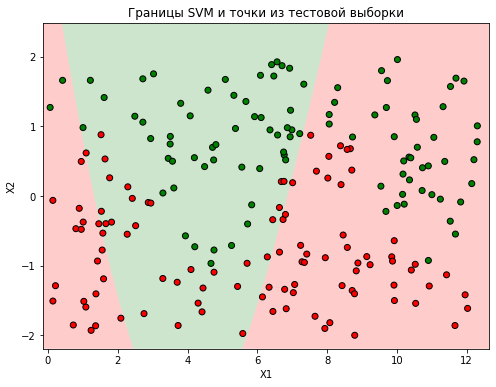

Ядро:  poly
Ошибка для тестовой выборки:  0.125
Ошибка для тренировочной выборки:  0.17500000000000004


C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


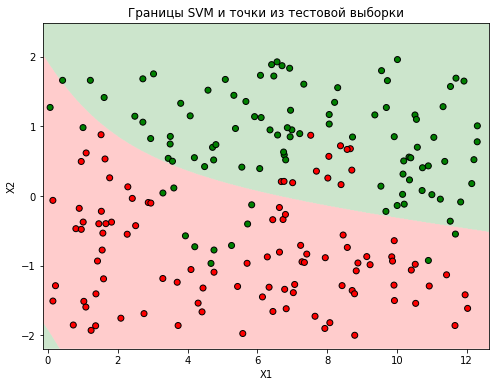

In [18]:
kernels = ['rbf', 'sigmoid']
for kernel in kernels:
    model = svm.SVC(kernel=kernel, C=2)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    print("Ядро: ", kernel)
    print("Ошибка для тестовой выборки: ", 1-accuracy_score(y_test, y_predict_test))
    print("Ошибка для тренировочной выборки: ", 1-accuracy_score(y_train, y_predict_train))
    colors = np.where(y_test == 0, 'red', 'green')

    xx_train, yy_train, Z_train = grid(X_train, model)    

    plt.figure(figsize=(8, 6))
    plt.contourf(xx_train, yy_train, Z_train, cmap=ListedColormap(['r', 'g']), alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
    plt.scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Границы SVM и точки из тестовой выборки')
    plt.show()
model = svm.SVC(kernel='poly', C=25, degree=2)
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)
print("Ядро:  poly")
print("Ошибка для тестовой выборки: ", 1-accuracy_score(y_test, y_predict_test))
print("Ошибка для тренировочной выборки: ", 1-accuracy_score(y_train, y_predict_train))

colors = np.where(y_test == 0, 'red', 'green')

xx_train, yy_train, Z_train = grid(X_train, model)    

plt.figure(figsize=(8, 6))
plt.contourf(xx_train, yy_train, Z_train, cmap=ListedColormap(['r', 'g']), alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
plt.scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Границы SVM и точки из тестовой выборки')
plt.show()

# Задание 5

In [30]:
train_data = pd.read_csv("svmdata5.txt", delimiter="\t")
test_data = pd.read_csv("svmdata5test.txt", delimiter="\t")
X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]
y_train = y_train.apply(lambda x: 0 if x == 'red' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'red' else 1)

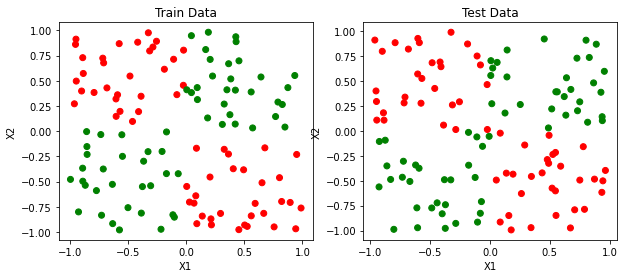

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

colors_train = np.where(y_train == 0, 'red', 'green')
axs[0].scatter(X_train["X1"], X_train["X2"], c=colors_train)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_title("Train Data")

colors_test = np.where(y_test == 0, 'red', 'green')
axs[1].scatter(X_test["X1"], X_test["X2"], c=colors_test)
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
axs[1].set_title("Test Data")

plt.show()

Ядро:  poly
Ошибка для тестовой выборки:  0.033333333333333326
Ошибка для тренировочной выборки:  0.0


C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


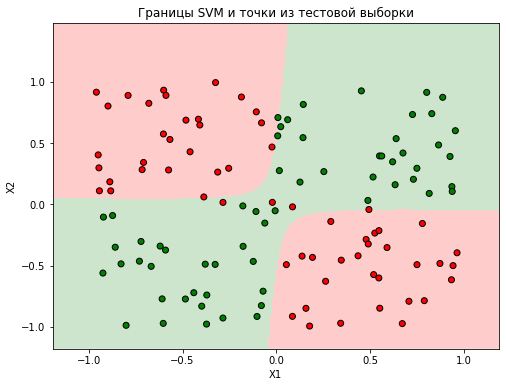

Ядро:  rbf
Ошибка для тестовой выборки:  0.05833333333333335
Ошибка для тренировочной выборки:  0.008333333333333304


C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


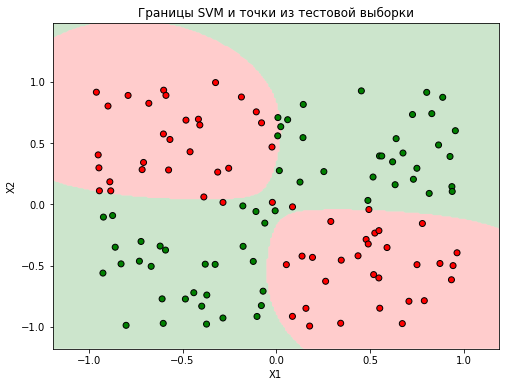

Ядро:  sigmoid
Ошибка для тестовой выборки:  0.5333333333333333
Ошибка для тренировочной выборки:  0.4916666666666667


C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


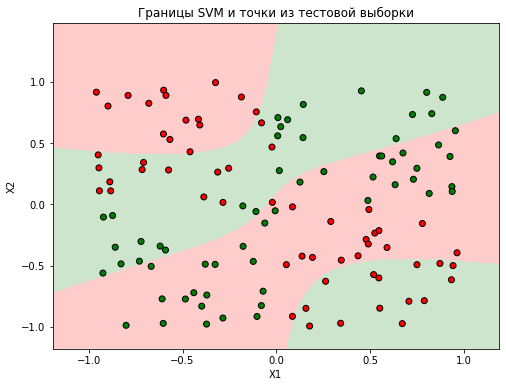

In [33]:
kernels = ['poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = svm.SVC(kernel=kernel, C=25, degree=2)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    print("Ядро: ", kernel)
    print("Ошибка для тестовой выборки: ", 1-accuracy_score(y_test, y_predict_test))
    print("Ошибка для тренировочной выборки: ", 1-accuracy_score(y_train, y_predict_train))
    colors = np.where(y_test == 0, 'red', 'green')

    xx_train, yy_train, Z_train = grid(X_train, model)    

    plt.figure(figsize=(8, 6))
    plt.contourf(xx_train, yy_train, Z_train, cmap=ListedColormap(['r', 'g']), alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
    plt.scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Границы SVM и точки из тестовой выборки')
    plt.show()

Можно заметить, что "poly" и "radial" показывают себя примерно одинаково, однако "poly" всё же немного лучше.

C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

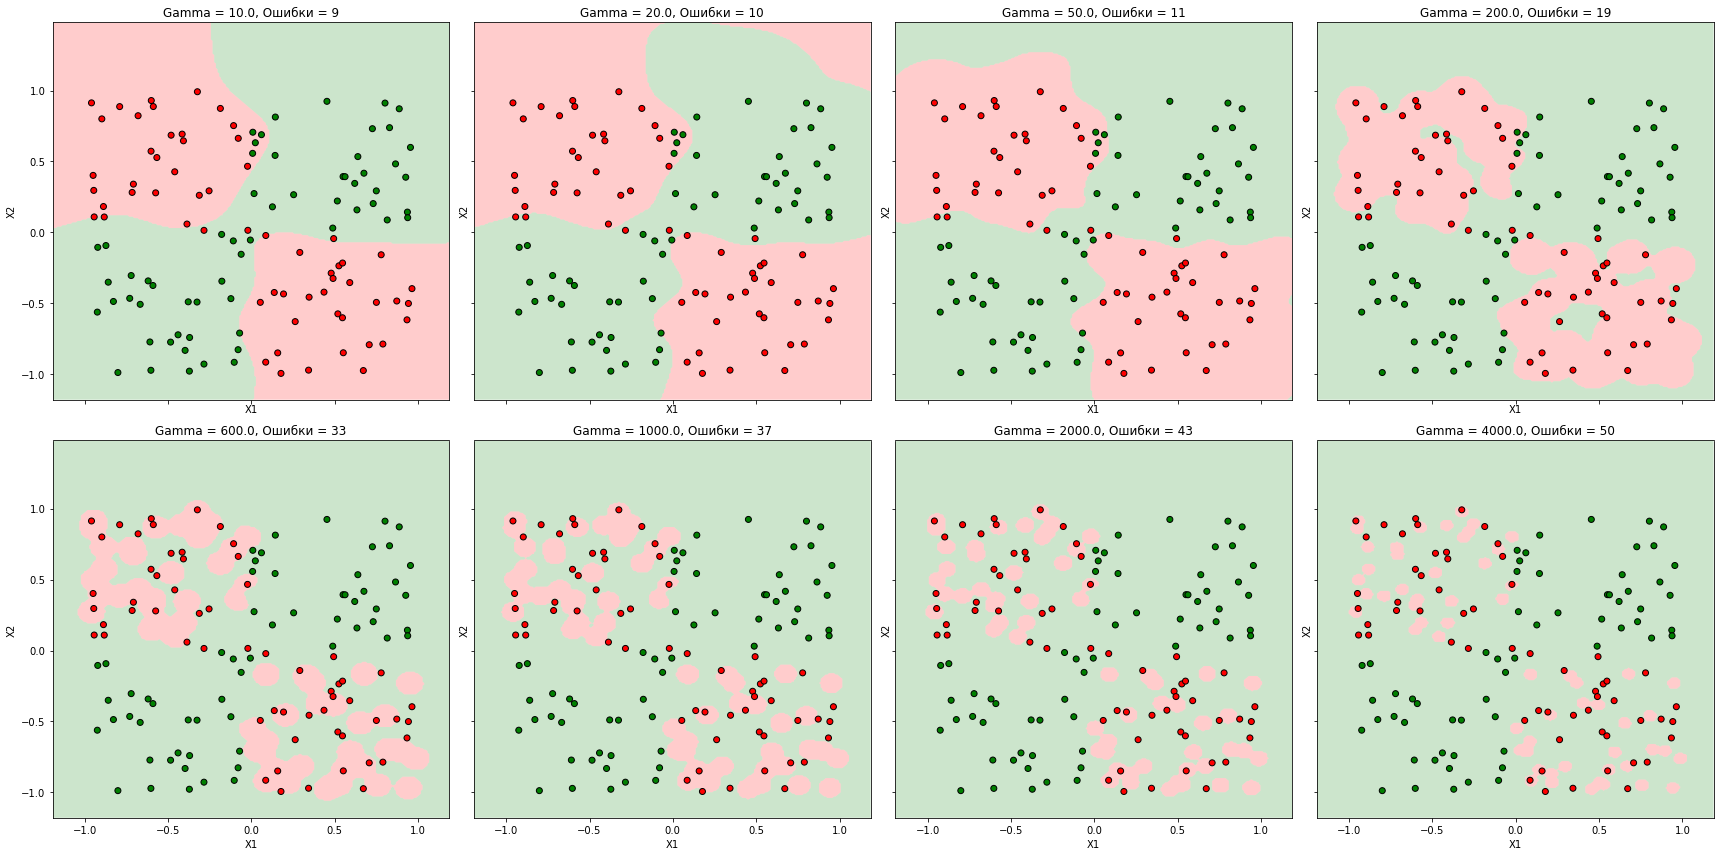

In [43]:
num_rows = 2
num_cols = 4

gammas = [10.0, 20.0, 50.0, 200.0, 600.0, 1000.0, 2000.0, 4000.0]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(24,12), sharex=True, sharey=True)

for i, gamma in zip(range(0, 11), gammas):
    row = i // num_cols
    col = i % num_cols

    model = svm.SVC(C=25, kernel='rbf', gamma=gamma)
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    errors_on_test_set = len(y_test) - accuracy_score(y_test, y_test_pred, normalize=False)

    xx_train, yy_train, Z_train = grid(X_train, model)

    axes[row, col].contourf(xx_train, yy_train, Z_train, cmap=ListedColormap(['r', 'g']), alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
    axes[row, col].scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
    axes[row, col].set_xlabel('X1')
    axes[row, col].set_ylabel('X2')
    axes[row, col].set_title(f"Gamma = {round(gamma, 2)}, Ошибки = {errors_on_test_set}")

plt.tight_layout()
plt.show()

Можно заметить, что при увеличении gamma метод всё сильнее теряет обобщение и сводится к поточечным областям. Происходит переобучение

# Задание 6

In [53]:
data = pd.read_csv("svmdata6.txt", delimiter="\t")

X_train = data["X"]
y_train = data["Y"]

X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

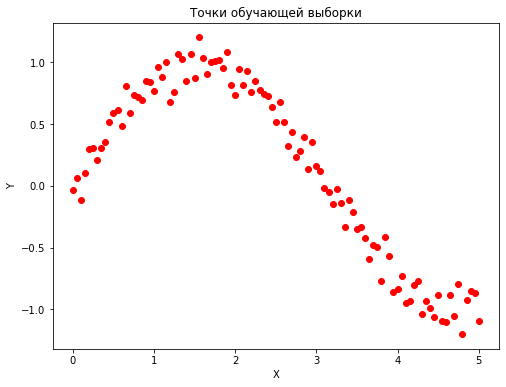

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Точки обучающей выборки')
plt.show()

In [55]:
model = svm.SVR(C=25, kernel='rbf', epsilon=0.1)
model.fit(X_train, y_train)

C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=25)

In [56]:
y_predict = model.predict(X_train)
params = model.get_params()

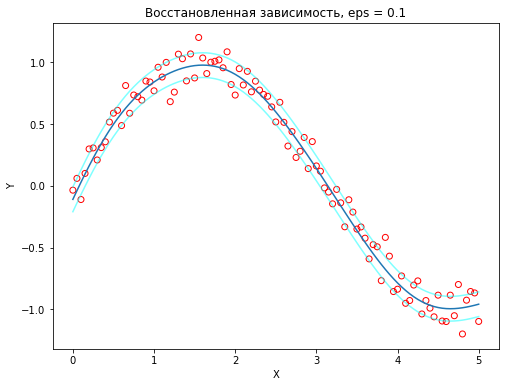

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, facecolors="None", edgecolors='r')
plt.plot(X_train, y_predict)
plt.plot(X_train, y_predict + params['epsilon'], color='cyan', alpha=0.5)
plt.plot(X_train, y_predict - params['epsilon'], color='cyan', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"Восстановленная зависимость, eps = {params['epsilon']}")
plt.show()

C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\semen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

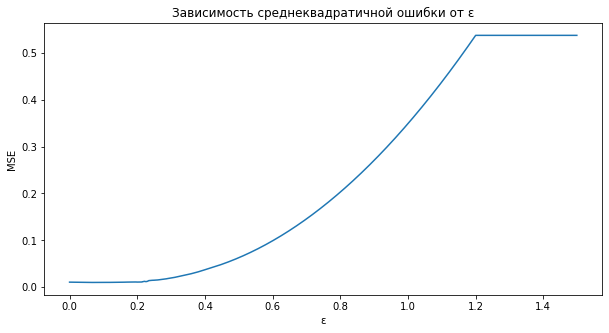

In [59]:
epsilons = []
mean_squared_errors = []

for eps in np.arange(0.0, 1.5, 0.001):
    model = svm.SVR(C=25, kernel='rbf', epsilon=eps)
    model.fit(X_train, y_train)
    
    y_predict = model.predict(X_train)
    
    epsilons.append(eps)
    mean_squared_errors.append(mean_squared_error(y_train,y_predict))
    
    
plt.figure(figsize=(10, 5))
plt.plot(epsilons, mean_squared_errors)
plt.xlabel('ε')
plt.ylabel('MSE')
plt.title("Зависимость среднеквадратичной ошибки от ε")
plt.show()